<a href="https://colab.research.google.com/github/IvanPP1018/SIMULACION-1/blob/main/Estimaci%C3%B3n_pi_Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Estimación de $\pi$ usando el Método Monte Carlo.**


El método de Monte Carlo es un enfoque probabilístico para estimar el valor de $\pi$. En este método, generamos puntos aleatorios en un cuadrado de lado 1 y contamos cuántos caen dentro de un cuarto de círculo de radio 1.




1. Generamos dos números aleatorios $u_1$ y $u_2$ en el intervalo [0, 1].
2. Contamos cuántos de estos puntos satisfacen la condición $u_1^2 + u_2^2 \leq 1$, que corresponde a los puntos dentro del cuarto de círculo.
3. La estimación de $\pi$ se obtiene usando la proporción de puntos dentro del cuarto de círculo multiplicada por 4.

$$
\pi \approx 4 \cdot \frac{\text{Número de puntos dentro del círculo}}{\text{Número total de puntos}}
$$

pi:  3.144


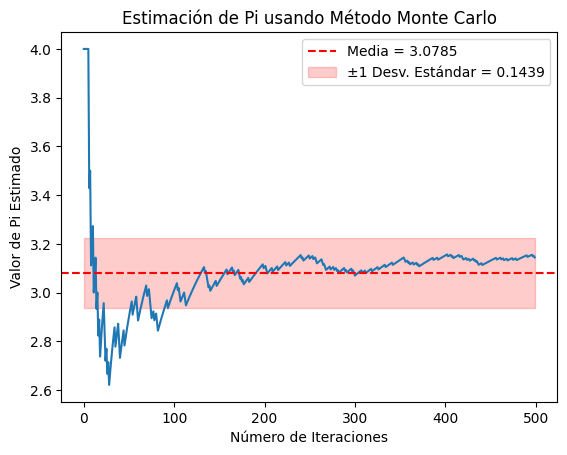

Media = 3.0784964117190508
Desviación Estándar = 0.14390457423815275


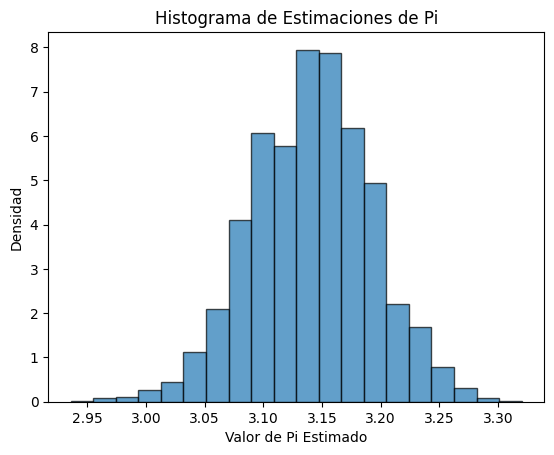

In [31]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import scipy.stats as stats  # Importación corregida

def estimacion(N):
    lis = []
    exi = 0
    for i in range(N):
        u1 = rnd.uniform(0,1)
        u2 = rnd.uniform(0,1)
        if u2 <= np.sqrt(1 - u1**2):
            exi += 1
        prob = exi / (i + 1)
        lis.append(4 * prob)
    return lis

N = 500
G = estimacion(N)
print("pi: ", G[-1])

# Graficar la estimación de Pi
plt.plot(G)

# Cálculo de la media y desviación estándar
media = np.mean(G)
desviacion_estandar = np.std(G)

# Graficar la media
plt.axhline(y=media, color='r', linestyle='--', label=f'Media = {media:.4f}')

# Graficar una banda de ±1 desviación estándar alrededor de la media
plt.fill_between(range(N), media - desviacion_estandar, media + desviacion_estandar, color='r', alpha=0.2, label=f'±1 Desv. Estándar = {desviacion_estandar:.4f}')

# Agregar etiquetas y leyenda
plt.xlabel('Número de Iteraciones')
plt.ylabel('Valor de Pi Estimado')
plt.title('Estimación de Pi usando Método Monte Carlo')
plt.legend()
plt.show()

# Imprimir los valores de media y desviación estándar
print("Media =", media)
print("Desviación Estándar =", desviacion_estandar)

def simulacion(M, N):
    r = []
    for i in range(M):
        R = estimacion(N)
        r.append(R[-1])  # Guardar solo el último valor de cada estimación
    return r

# Realizar 5000 simulaciones con 1000 iteraciones cada una
M = 5000
N = 1000
S = simulacion(M, N)

# Calcular la media y desviación estándar de las simulaciones
media_sim = np.mean(S)
desviacion_sim = np.std(S)

# Graficar el histograma de las simulaciones
plt.hist(S, bins=20, density=True, edgecolor='black', alpha=0.7)
# Agregar etiquetas y leyenda
plt.xlabel('Valor de Pi Estimado')
plt.ylabel('Densidad')
plt.title('Histograma de Estimaciones de Pi')
plt.show()
